# 1 Beyound Blue EDA (unflattened)

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import emoji
import json
from collections import Counter

# Load CSV
df = pd.read_csv("data/beyondblue_data.csv")

## 1.1 Basic view

In [244]:
# Basic info
df.head()

,post_id,title,author,date,category,preview,post_text,num_comments,comments_combined,url
0,1,Struggling at the moment,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...","Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/st...
1,2,Anxiety,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/an...
2,3,overwhelmed,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ov...
3,4,Stalker,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/st...
4,5,Generalised Anxiety disorder not going good,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...","Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ge...


In [245]:
print(df.dtypes)

post_id               int64
title                object
author               object
date                 object
category             object
preview              object
post_text            object
num_comments          int64
comments_combined    object
url                  object
dtype: object


In [246]:
print(df.shape)

(6753, 10)


In [247]:
# Check for missing values
na_counts = df.isna().sum().sort_values(ascending=False)
print("=== Missing Values per Column ===")
print(na_counts.to_frame("missing_count"))
print("\nAny missing values? ->", na_counts.sum() > 0)

=== Missing Values per Column ===
                   missing_count
post_id                        0
title                          0
author                         0
date                           0
category                       0
preview                        0
post_text                      0
num_comments                   0
comments_combined              0
url                            0

Any missing values? -> False


In [248]:
# Check for duplicate rows
dup_rows = df.duplicated().sum()
print("\n=== Duplicate Rows ===")
print("Number of completely duplicated rows:", dup_rows)


=== Duplicate Rows ===
Number of completely duplicated rows: 0


# 1.2 Cleaning

### Fixing datetime

In [249]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check the range of dates
print("Earliest post date:", df['date'].min())
print("Latest post date:", df['date'].max())

# Number of posts per year
print("\nPosts per year:")
print(df['date'].dt.year.value_counts().sort_index())

# Number of posts per month (across years)
print("\nPosts per month (YYYY-MM):")
print(df['date'].dt.to_period('M').value_counts().sort_index())

Earliest post date: 2019-01-06 00:00:00
Latest post date: 2025-07-18 00:00:00

Posts per year:
date
2019     421
2020     665
2021    1438
2022    1378
2023    1374
2024    1038
2025     439
Name: count, dtype: int64

Posts per month (YYYY-MM):
date
2019-01    19
2019-02    22
2019-03    44
2019-04    22
2019-05    36
           ..
2025-03    89
2025-04    62
2025-05    56
2025-06    50
2025-07    27
Freq: M, Name: count, Length: 79, dtype: int64


In [250]:
df.head()

,post_id,title,author,date,category,preview,post_text,num_comments,comments_combined,url
0,1,Struggling at the moment,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...","Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/st...
1,2,Anxiety,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",https://forums.beyondblue.org.au/t5/anxiety/an...
2,3,overwhelmed,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ov...
3,4,Stalker,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/st...
4,5,Generalised Anxiety disorder not going good,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...","Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",https://forums.beyondblue.org.au/t5/anxiety/ge...


### I think post_id, title, preview, url is unnecessary, so i will get rid of them.

In [251]:
# Drop unnecessary columns
df = df.drop(columns=['title', 'preview', 'url'])

# Check remaining columns
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['post_id', 'author', 'date', 'category', 'post_text', 'num_comments', 'comments_combined']


In [252]:
df.head()

,post_id,author,date,category,post_text,num_comments,comments_combined
0,1,Toby,2025-07-16,Anxiety,"Hello everyone, this is my first post, so I ho...",4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,Shell1,2025-05-23,Anxiety,Hi my name is Michelle and I have had Anxiety ...,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,Guest_87295139,2025-07-14,Anxiety,sorry if this is alot i just rlly need to get ...,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,G-i-g-i,2025-07-14,Anxiety,I feel no one is supporting me. I have a stalk...,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,Lil123,2025-07-14,Anxiety,"Hi, my name is lily. I have no idea what else ...",2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [253]:
# Bring post_id column to front
df = df[['post_id'] + [col for col in df.columns if col != 'post_id']]
df.head()

# Bring date column to second position
df = df[['post_id', 'date'] + [col for col in df.columns if col not in ['post_id', 'date']]]
df.head()

# Bring author in third position
df = df[['post_id', 'date', 'author'] + [col for col in df.columns if col not in ['post_id', 'date', 'author']]]
df.head()

# Bring post_text column in fourth position
df = df[['post_id', 'date', 'author', 'post_text'] + [col for col in df.columns if col not in ['post_id', 'date', 'author', 'post_text']]]
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [254]:
# Find emoticons in post_text using emoji.is_emoji
df['emoticons'] = df['post_text'].apply(lambda x: [char for char in x if emoji.is_emoji(char)])
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined,emoticons
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",[]
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",[]
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]


In [255]:
# How many posts contain emojis?
posts_with_emojis = df[df['emoticons'].str.len() > 0]
posts_with_emojis_count = posts_with_emojis.shape[0]
posts_with_emojis_count

467

In [256]:
# Display all the distinct emoticons used
distinct_emoticons = df['emoticons'].explode().unique()
distinct_emoticons

array([nan, '😦', '😢', '❤', '😕', '🙂', '😞', '😭', '🕴', '😇', '🤦', '🏻', '♀',
       '🌙', '✋', '😌', '🚬', '🙏', '🏼', '🩷', '💕', '♥', '😫', '☹', '©', '🫶',
       '😪', '😩', '😄', '😊', '👋', '☺', '💖', '🙄', '🤷', '😔', '😓', '😅', '😎',
       '💭', '😵', '🌿', '🛁', '✍', '👣', '🤓', '🤠', '😀', '💚', '😶', '😣', '✌',
       '🥲', '💓', '🤔', '🌻', '💜', '🤗', '💗', '😂', '💙', '🤯', '💪', '🥺', '🧐',
       '😬', '😠', '🤞', '😆', '✊', '🧡', '🍅', '💛', '🧚', '🙋', '💝', '✨', '😉',
       '😥', '☁', '🖤', '😑', '😏', '😝', '🚨', '💡', '😃', '💔', '🏾', '😡', '🤣',
       '👍', '🌱', '👉', '👈', '😿', '🌴', '🦋', '🫣', '🙊', '🥰', '💞', '😛', '🐕',
       '🦺', '🎂', '🌞', '🐻', '😮', '👐', '🌸', '😨', '🐄', '😯', '🌷', '❣', '🕊',
       '⚠', '🙇', '⛔', '♂', '😐'], dtype=object)

In [257]:
# Remove the emojis
df['post_text'] = df['post_text'].apply(lambda x: ''.join([char for char in x if not emoji.is_emoji(char)]))
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined,emoticons
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times...",[]
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times...",[]
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""...",[]


In [258]:
# Check if any emojis left
df['post_text'].apply(lambda x: any(emoji.is_emoji(char) for char in x))

# False count and True count
df['post_text'].apply(lambda x: any(emoji.is_emoji(char) for char in x)).value_counts()

post_text
False    6753
Name: count, dtype: int64

In [259]:
# Remove emoticons column
df = df.drop(columns=['emoticons'])
df.head()

,post_id,date,author,post_text,category,num_comments,comments_combined
0,1,2025-07-16,Toby,"Hello everyone, this is my first post, so I ho...",Anxiety,4,"[{""comment_id"": ""1"", ""author"": ""Morph"", ""times..."
1,2,2025-05-23,Shell1,Hi my name is Michelle and I have had Anxiety ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""Croix"", ""times..."
2,3,2025-07-14,Guest_87295139,sorry if this is alot i just rlly need to get ...,Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
3,4,2025-07-14,G-i-g-i,I feel no one is supporting me. I have a stalk...,Anxiety,3,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."
4,5,2025-07-14,Lil123,"Hi, my name is lily. I have no idea what else ...",Anxiety,2,"[{""comment_id"": ""1"", ""author"": ""TrueSeeker"", ""..."


In [260]:
# Save the dataset as a CSV file named "beyondblue_data_unflattened.csv" in the folder named "data"
df.to_csv('data/beyondblue_data_unflattened.csv', index=False)

## 1.3 EDA

category
Depression                         1968
Anxiety                            1951
Suicidal thoughts and self-harm    1445
PTSD and trauma                    1389
Name: count, dtype: int64


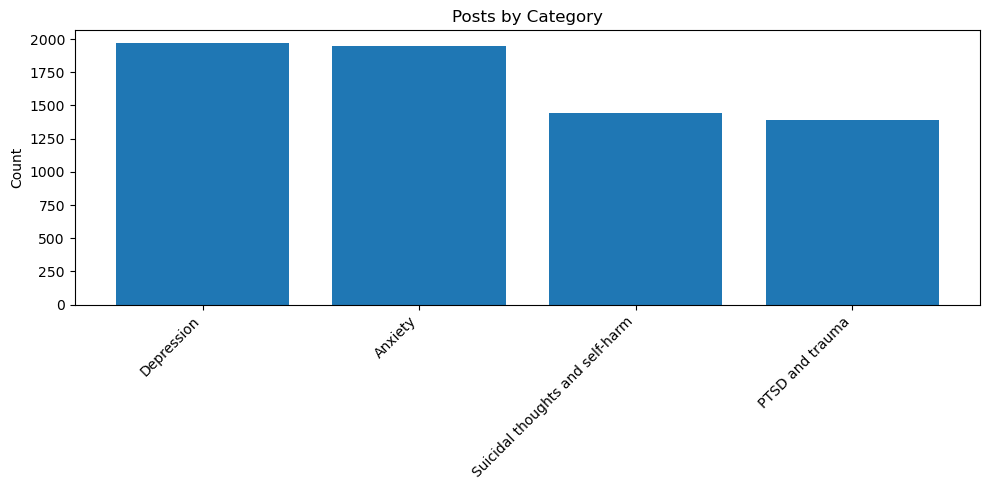

In [261]:
# which categories are most active? (bar chart + table)
cat_counts = df['category'].value_counts()

print(cat_counts)

plt.figure(figsize=(10,5))
plt.bar(cat_counts.index, cat_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("Posts by Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [262]:
# the ratio of post per category
post_per_cat = df['category'].value_counts() / df['category'].count()
print(post_per_cat)

category
Depression                         0.291426
Anxiety                            0.288909
Suicidal thoughts and self-harm    0.213979
PTSD and trauma                    0.205686
Name: count, dtype: float64


In [263]:
# posts per year and per month (tables)
posts_per_year = df['date'].dt.year.value_counts().sort_index()
posts_per_month = df['date'].dt.to_period('M').value_counts().sort_index()

print("Posts per year:\n", posts_per_year, "\n")
print("Posts per month (YYYY-MM):\n", posts_per_month)

Posts per year:
 date
2019     421
2020     665
2021    1438
2022    1378
2023    1374
2024    1038
2025     439
Name: count, dtype: int64 

Posts per month (YYYY-MM):
 date
2019-01    19
2019-02    22
2019-03    44
2019-04    22
2019-05    36
           ..
2025-03    89
2025-04    62
2025-05    56
2025-06    50
2025-07    27
Freq: M, Name: count, Length: 79, dtype: int64


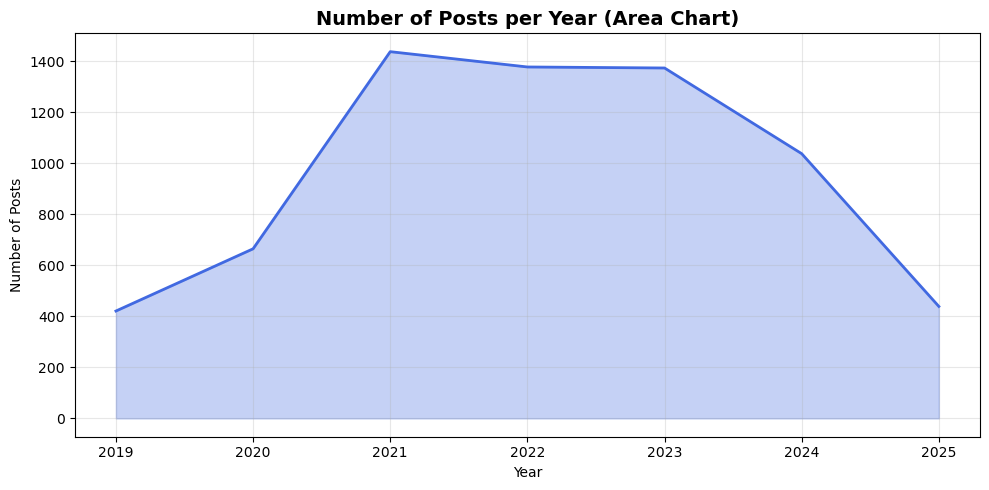

In [264]:
# posts per year
posts_per_year = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=posts_per_year.index, y=posts_per_year.values, color="royalblue", linewidth=2)

# fill area
plt.fill_between(posts_per_year.index, posts_per_year.values, alpha=0.3, color="royalblue")

plt.title("Number of Posts per Year (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

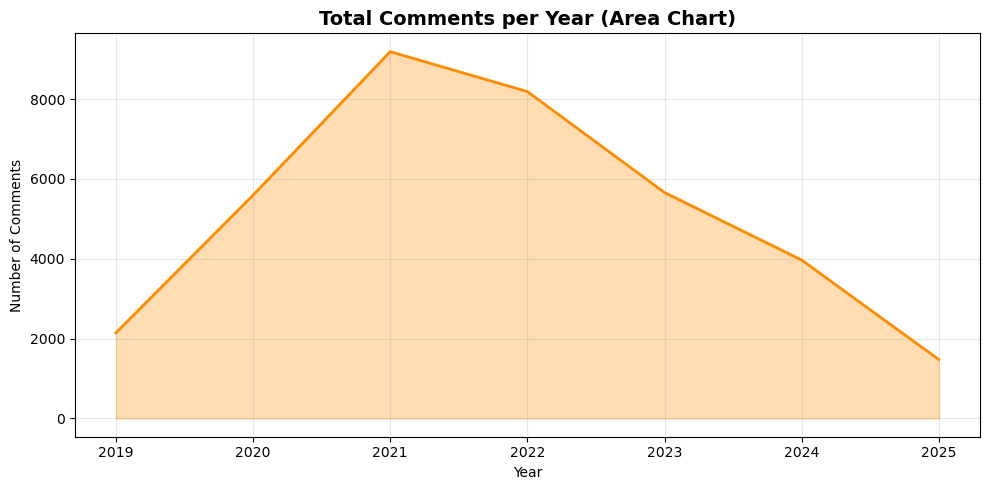

In [265]:
# comments per year
comments_per_year = df.groupby(df['date'].dt.year)['num_comments'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=comments_per_year.index, y=comments_per_year.values, color="darkorange", linewidth=2)

# fill area
plt.fill_between(comments_per_year.index, comments_per_year.values, alpha=0.3, color="darkorange")

plt.title("Total Comments per Year (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Comments")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

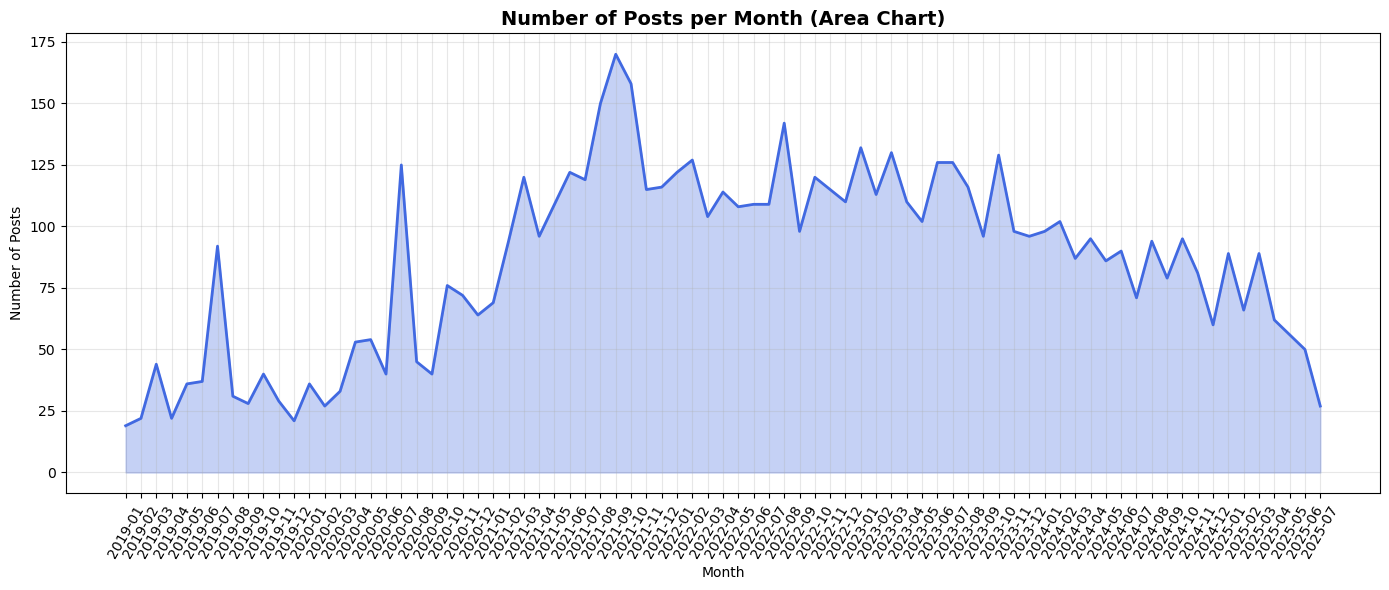

In [266]:
# posts per month
posts_per_month = df['date'].dt.to_period('M').value_counts().sort_index()
posts_per_month.index = posts_per_month.index.astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(x=posts_per_month.index, y=posts_per_month.values, color="royalblue", linewidth=2)

# fill area under curve
plt.fill_between(posts_per_month.index, posts_per_month.values, alpha=0.3, color="royalblue")

plt.title("Number of Posts per Month (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

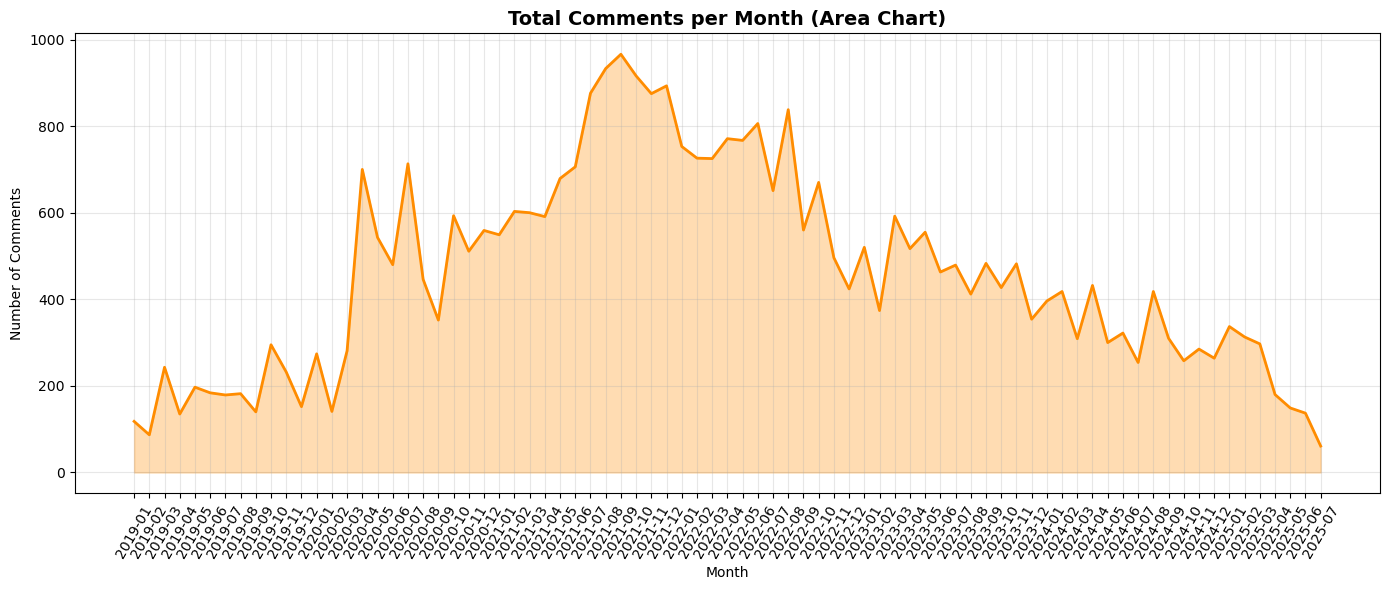

In [267]:
# comments per month
comments_per_month = df.groupby(df['date'].dt.to_period('M'))['num_comments'].sum().sort_index()
comments_per_month.index = comments_per_month.index.astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(x=comments_per_month.index, y=comments_per_month.values, color="darkorange", linewidth=2)

# fill area under curve
plt.fill_between(comments_per_month.index, comments_per_month.values, alpha=0.3, color="darkorange")

plt.title("Total Comments per Month (Area Chart)", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=60)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [268]:
# total comments per year and per month (tables)
comments_per_year = df.groupby(df['date'].dt.year)['num_comments'].sum().sort_index()
comments_per_month = df.groupby(df['date'].dt.to_period('M'))['num_comments'].sum().sort_index()

print("Total comments per year:\n", comments_per_year, "\n")
print("Total comments per month (YYYY-MM):\n", comments_per_month)

Total comments per year:
 date
2019    2144
2020    5593
2021    9187
2022    8187
2023    5658
2024    3966
2025    1474
Name: num_comments, dtype: int64 

Total comments per month (YYYY-MM):
 date
2019-01    118
2019-02     87
2019-03    243
2019-04    135
2019-05    197
          ... 
2025-03    297
2025-04    180
2025-05    149
2025-06    137
2025-07     61
Freq: M, Name: num_comments, Length: 79, dtype: int64


Average post length: 1190.2505553087517
Max post length: 4863


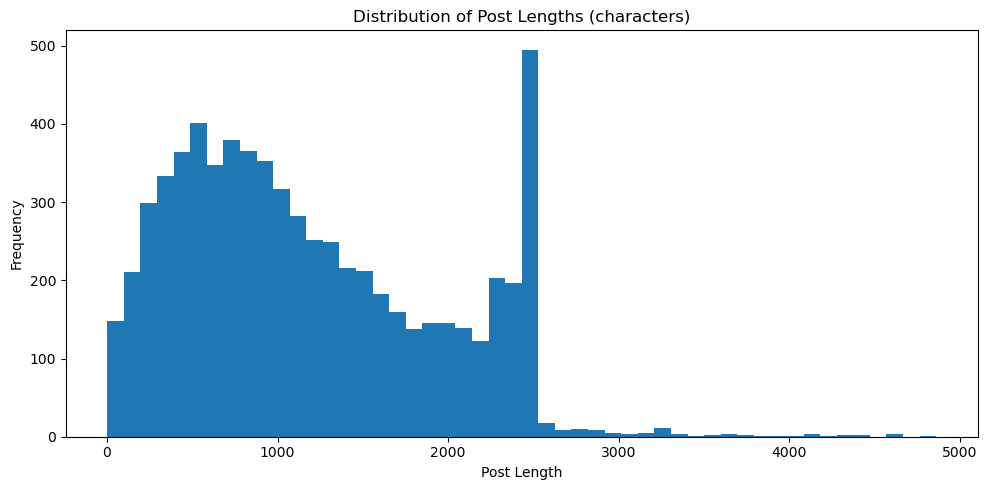

In [269]:
# average post length + distribution
df['post_length'] = df['post_text'].astype(str).str.len()

print("Average post length:", df['post_length'].mean())
print("Max post length:", df['post_length'].max())

plt.figure(figsize=(10,5))
plt.hist(df['post_length'], bins=50)
plt.title("Distribution of Post Lengths (characters)")
plt.xlabel("Post Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

count    6753.000000
mean        5.361913
std         6.867736
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        40.000000
Name: num_comments, dtype: float64


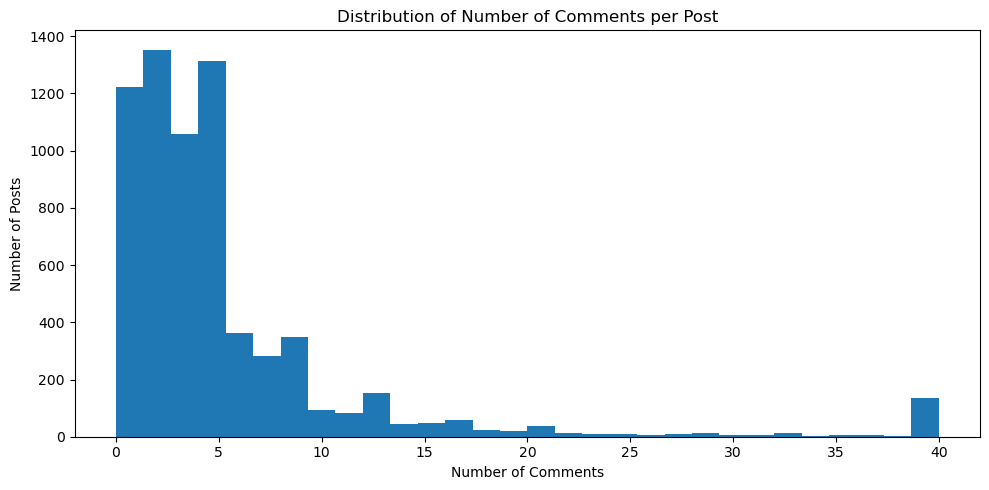

In [270]:
# distribution of num_comments + summary stats
print(df['num_comments'].describe())

plt.figure(figsize=(10,5))
plt.hist(df['num_comments'], bins=30)
plt.title("Distribution of Number of Comments per Post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

In [271]:
# top 10 most commented posts (with a short preview)
top_commented = (
    df.assign(preview=df['post_text'].astype(str).str.slice(0, 80))
      .sort_values('num_comments', ascending=False)
      .loc[:, ['post_id', 'num_comments', 'post_text']]
      .head(10)
)

top_commented

,post_id,num_comments,post_text
3406,3407,40,"I have nothing to live for, my psychiatrist pu..."
5858,5859,40,"Feeling nothing, im stepping out my comfort z..."
1363,1364,40,Hi I think have this Cherophobia and wonder if...
5973,5974,40,I find that the hardest time of all are the ev...
3176,3177,40,"Hi All, Each moment of every day, we have thou..."
95,96,40,"hey there, what physical symptoms of anxiety d..."
4346,4347,40,"Hi, I am getting past my last big attack of p..."
6428,6429,40,"For a while, I've been struggling with depress..."
2595,2596,40,"Hi all, I have been depressed from some years ..."
5988,5989,40,Hi lovely people I just wanted to start this t...


In [272]:
# top 10 most active users (by number of original posts)
top_authors = df['author'].value_counts().head(10)
print(top_authors)

author
Cookie64          69
Lost__            69
white knight      36
Elephant86        25
Eagle Ray         20
Rupes79           19
PsychedelicFur    19
Alel              19
Earth Girl        18
Beaser            17
Name: count, dtype: int64


In [273]:
# top 10 most active commenters
comment_authors = Counter()

# loop through all rows and parse the comments_combined column
for row in df['comments_combined'].dropna():
    try:
        comments = json.loads(row.replace("'", '"'))  # ensure valid JSON
        for c in comments:
            comment_authors[c.get('author')] += 1
    except Exception as e:
        continue  # skip if there's a parsing issue

# get top 10 commenters
top_commenters = comment_authors.most_common(10)

print("Top 10 most active commenters:")
for user, count in top_commenters:
    print(f"{user}: {count} comments")

Top 10 most active commenters:
Sophie_M: 137 comments
Ggrand: 106 comments
Petal22: 76 comments
Eagle Ray: 65 comments
quirkywords: 47 comments
Summer Rose: 27 comments
jaz28: 23 comments
white knight: 19 comments
smallwolf: 19 comments
Scared: 18 comments


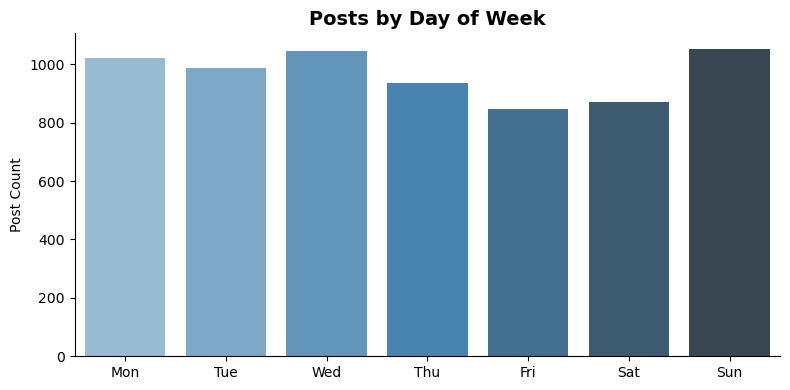

In [274]:
# posts per day-of-week
dow = df['date'].dt.dayofweek.value_counts().sort_index()
dow = dow.rename_axis('day').reset_index(name='posts')
dow['day'] = dow['day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

plt.figure(figsize=(8,4))
sns.barplot(data=dow, x='day', y='posts', hue='day', palette="Blues_d", legend=False)
plt.title("Posts by Day of Week", fontsize=14, weight='bold')
plt.xlabel(""); plt.ylabel("Post Count")
sns.despine(); plt.tight_layout(); plt.show()

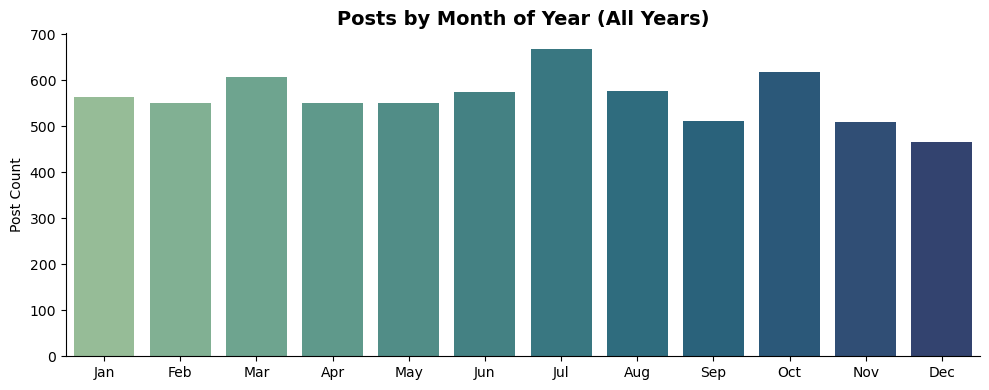

In [275]:
# posts per month-of-year
moy = df['date'].dt.month.value_counts().sort_index()
moy = moy.rename_axis('month').reset_index(name='posts')
moy['month'] = moy['month'].map({
    1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
    7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
})

plt.figure(figsize=(10,4))
sns.barplot(data=moy, x='month', y='posts', hue='month', palette="crest", legend=False)
plt.title("Posts by Month of Year (All Years)", fontsize=14, weight='bold')
plt.xlabel(""); plt.ylabel("Post Count")
sns.despine(); plt.tight_layout(); plt.show()

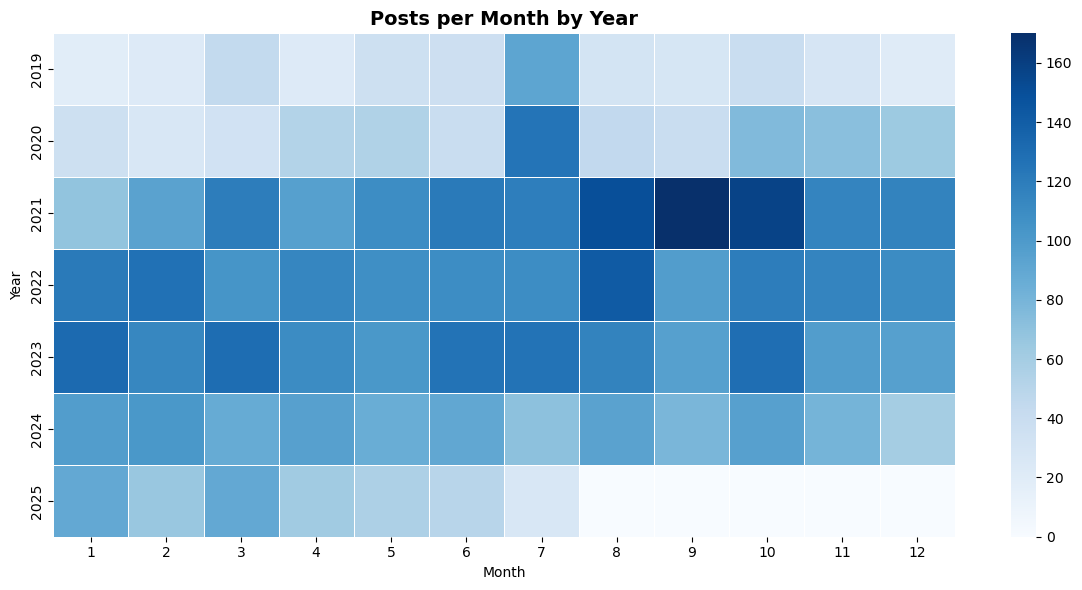

In [276]:
# calendar-style heatmap: posts per month per year
ym = (df['date'].dt.to_period('M')
                .value_counts()
                .sort_index())
heat = ym.rename_axis('ym').to_frame('posts')
heat['year'] = heat.index.astype(str).str.slice(0,4).astype(int)
heat['month'] = heat.index.astype(str).str.slice(5,7).astype(int)

pivot = heat.pivot_table(index='year', columns='month', values='posts', fill_value=0)
pivot = pivot.reindex(columns=range(1,13))  # ensure Jan..Dec order

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='Blues', linewidths=.5)
plt.title("Posts per Month by Year", fontsize=14, weight='bold')
plt.xlabel("Month"); plt.ylabel("Year")
plt.tight_layout(); plt.show()